In this notebook, you will:

1. Implement a Linear Regression model from scratch using the closed-form solution (Normal Equation).
2. Solve the same problem using Scikit-learn's Linear Regression module.
3. Extend this to a Multiple Linear Regression scenario.
4. Apply it to a real-world dataset.

Let's get started!

In [35]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We will first generate a synthetic dataset for a simple linear regression problem.

In [36]:
np.random.seed(42)  # For reproducibility

# Simple Linear Regression Data
X_simple = np.random.rand(100, 1) * 10  # Feature
y_simple = 3 * X_simple + np.random.randn(100, 1) * 2  # Target with noise

# Convert to DataFrame for visualization
df_simple = pd.DataFrame({'X': X_simple.flatten(), 'y': y_simple.flatten()})
df_simple.head()


,X,y
0,3.745401,11.410298
1,9.507143,27.923414
2,7.319939,22.143340
3,5.986585,13.984617
4,1.560186,4.241215


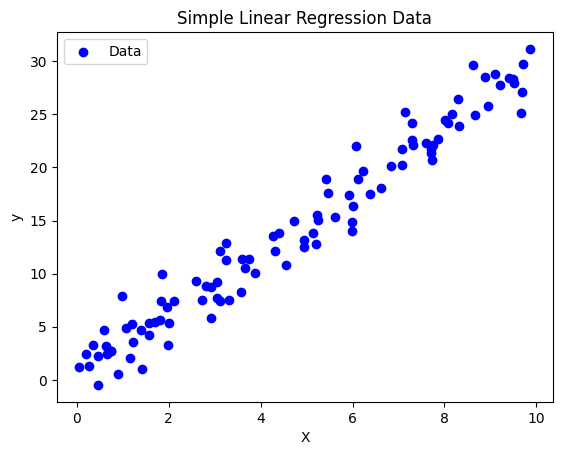

In [37]:
plt.scatter(X_simple, y_simple, color='blue', label='Data')
plt.title("Simple Linear Regression Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Implement Closed-Form Solution

In [38]:
# Add bias (intercept term)
X_simple_bias = np.c_[np.ones((X_simple.shape[0], 1)), X_simple]

# Compute weights
w_simple = np.linalg.inv(X_simple_bias.T @ X_simple_bias) @ X_simple_bias.T @ y_simple

# Predicted values
y_pred_simple_closed = X_simple_bias @ w_simple


# Print weights
print(f"Weights (Closed-Form Solution):\nIntercept: {w_simple[0][0]}, Slope: {w_simple[1][0]}")

Weights (Closed-Form Solution):
Intercept: 0.4301923150935001, Slope: 2.9080453545753935


In [39]:
# Compute the error between the predicted and true values

def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

mse_simple_closed = mean_squared_error(y_simple, y_pred_simple_closed)
print(f"Mean Squared Error (Closed-Form): {mse_simple_closed}")


Mean Squared Error (Closed-Form): 3.2263382558682125


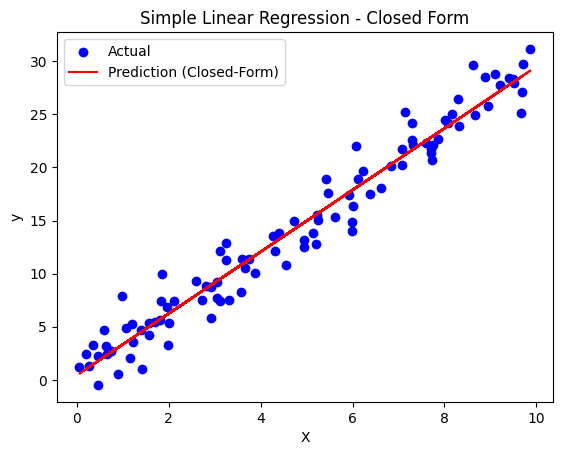

In [40]:
plt.scatter(X_simple, y_simple, color='blue', label='Actual')
plt.plot(X_simple, y_pred_simple_closed, color='red', label='Prediction (Closed-Form)')
plt.title("Simple Linear Regression - Closed Form")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Solving with scikit learn

In [ ]:
# Scikit-learn Solution for Simple Linear Regression

# fit the model
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

# make predictions
y_pred_simple_sklearn = model_simple.predict(X_simple)
intercept = model_simple.intercept_[0]
coeff = model_simple.coef_[0][0]

# Print weights
print(f"Weights (Scikit-learn):\nIntercept: {intercept}, Slope: {coeff}")

# Evaluate
mse_simple_sklearn = mean_squared_error(y_simple, y_pred_simple_sklearn)
print(f"Mean Squared Error (Scikit-learn): {mse_simple_sklearn}")

Weights (Scikit-learn):
Intercept: 0.4301923150934961, Slope: 2.9080453545753935
Mean Squared Error (Scikit-learn): 3.2263382558682125


## Multiple regression problem

Let's try this on a multiple linear regression problem now.

In [49]:
# Multiple Linear Regression Data
X_multi = np.random.rand(100, 2) * 10  # Two features
y_multi = 3 * X_multi[:, 0:1] + 2 * X_multi[:, 1:2] + np.random.randn(100, 1) * 2  # Target with noise

df_multi = pd.DataFrame({'X1': X_multi[:, 0], 'X2': X_multi[:, 1], 'y': y_multi.flatten()})

df_multi.head()

,X1,X2,y
0,8.623637,9.495206,43.972737
1,1.470735,9.265876,23.698558
2,4.921163,2.582444,21.442354
3,4.591358,9.800326,31.530394
4,4.926181,3.287516,23.092787


Implement closed-form solution

In [50]:
# Add bias (intercept term)
X_multi_bias = np.c_[np.ones((X_multi.shape[0], 1)), X_multi]

# Compute weights
w_multi = np.linalg.inv(X_multi_bias.T @ X_multi_bias) @ X_multi_bias.T @ y_multi

# Predicted values
y_pred_multi_closed = X_multi_bias @ w_multi

# Print weights
print(f"Weights (Closed-Form Solution): {w_multi.flatten()}")

Weights (Closed-Form Solution): [0.35749243 3.03090926 1.915687  ]


In [51]:
# Evaluate Multiple Linear Regression
mse_multi_closed = mean_squared_error(y_multi, y_pred_multi_closed)
print(f"Mean Squared Error (Closed-Form): {mse_multi_closed}")

Mean Squared Error (Closed-Form): 4.430966542274645


In [52]:
# Scikit-learn Solution for Multiple Linear Regression

# fit the model
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# make predictions
y_pred_multi_sklearn =model_multi.predict(X_multi)
intercept = model_simple.intercept_[0]
coeff = model_simple.coef_[0][0]

# Print weights
print(f"Weights (Scikit-learn):\nIntercept: {intercept}, Coefficients: {coeff}")

# Evaluate
mse_multi_sklearn = mean_squared_error(y_multi, y_pred_multi_sklearn)
print(f"Mean Squared Error (Scikit-learn): {mse_multi_sklearn}")

Weights (Scikit-learn):
Intercept: 0.4301923150934961, Coefficients: 2.9080453545753935
Mean Squared Error (Scikit-learn): 4.4309665422746445


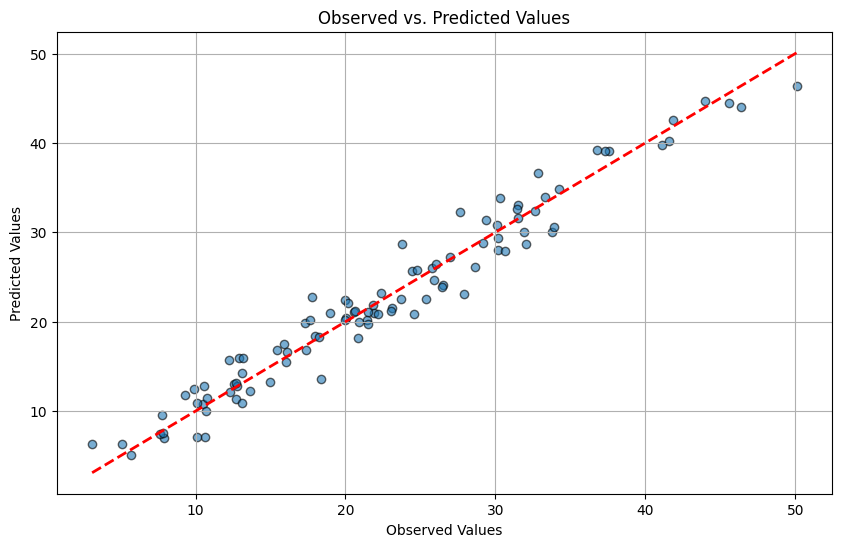

In [53]:
# Visualization - Observed vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_multi, y_pred_multi_sklearn, alpha=0.6, edgecolors='k')
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r--', lw=2)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs. Predicted Values")
plt.grid(True)
plt.show()


## Now let's work with a real-world dataset: the New York Stock Exchange dataset.

While we focus on this specific dataset, you can find several new datasets to apply and play around with [here](https://www.kaggle.com/datasets?tags=13405-Linear+Regression).


In [54]:
! pip install kagglehub

In [55]:
import kagglehub
path = kagglehub.dataset_download("dgawlik/nyse")

In [56]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dgawlik/nyse/versions/3


In [57]:
%cd /root/.cache/kagglehub/datasets/dgawlik/nyse/versions/3

/root/.cache/kagglehub/datasets/dgawlik/nyse/versions/3


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Preparing the data


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
prices_split = pd.read_csv("prices-split-adjusted.csv")

# Step 1: Exploratory Data Analysis (EDA)
print("Prices-split-adjusted dataset:")
print(prices_split.head(), "\n")

# Check for missing values
print("\nMissing values in prices-split-adjusted:\n", prices_split.isnull().sum())


Prices-split-adjusted dataset:
         date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0   


Missing values in prices-split-adjusted:
 date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


In [60]:
prices_split

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [61]:
prices_split.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


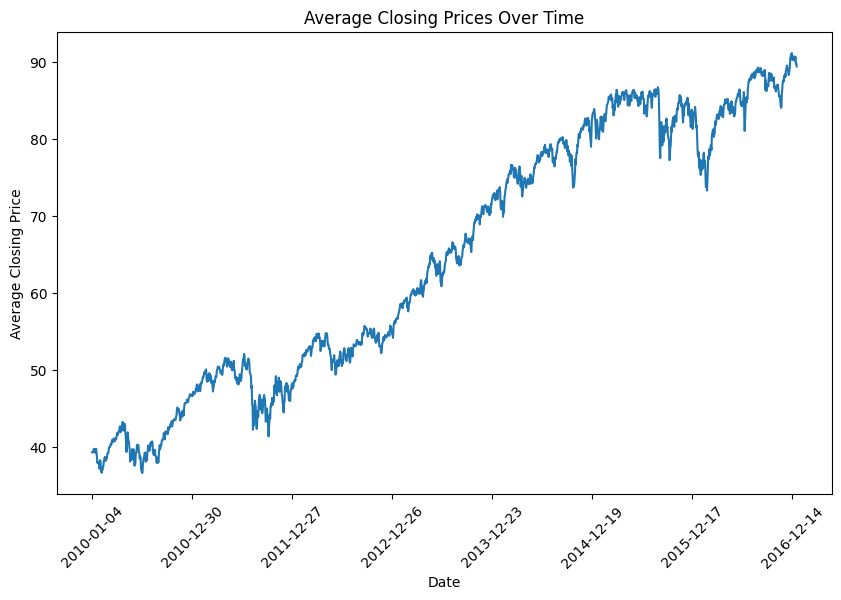

In [ ]:
plt.figure(figsize=(10, 6))
prices_split.groupby('date')['close'].mean().plot(title="Average Closing Prices Over Time")
plt.ylabel("Average Closing Price")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

In [62]:
# Filter a single stock for simplicity, e.g., 'AAPL'
stock_data = prices_split[prices_split['symbol'] == 'AAPL']
print("\nApple (AAPL) stock data:")
print(stock_data.head())

# Convert dates to datetime format and sort
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data = stock_data.sort_values(by='date')

stock_data['previous_close'] = stock_data['close'].shift(1)
stock_data['next_close'] = stock_data['close'].shift(-1)

# Drop rows with NaN values (from lagging/leading)
stock_data = stock_data.dropna()


Apple (AAPL) stock data:
            date symbol       open      close        low       high  \
254   2010-01-04   AAPL  30.490000  30.572857  30.340000  30.642857   
721   2010-01-05   AAPL  30.657143  30.625713  30.464285  30.798571   
1189  2010-01-06   AAPL  30.625713  30.138571  30.107143  30.747143   
1657  2010-01-07   AAPL  30.250000  30.082857  29.864286  30.285715   
2125  2010-01-08   AAPL  30.042856  30.282858  29.865715  30.285715   

           volume  
254   123432400.0  
721   150476200.0  
1189  138040000.0  
1657  119282800.0  
2125  111902700.0  


<ipython-input-62-26a49b30ad81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['date'] = pd.to_datetime(stock_data['date'])


In [63]:
# Step 3: Prepare data for Linear Regression
X = stock_data[['previous_close']]  # Feature
y = stock_data['next_close']       # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Step 4: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [65]:
# Step 5: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Evaluation:
Mean Squared Error: 4.09
R-squared: 0.99


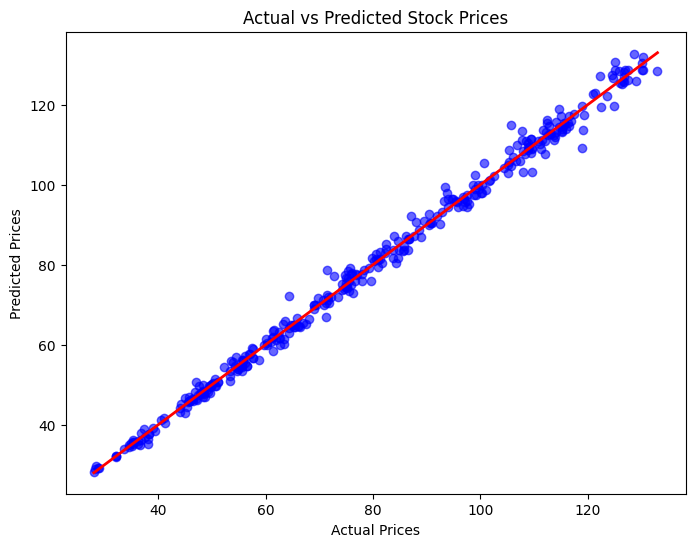


Model Coefficients:
Intercept: 0.25
Coefficient for 'previous_close': 1.00


In [66]:
# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Step 6: Analyze model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for 'previous_close': {model.coef_[0]:.2f}")


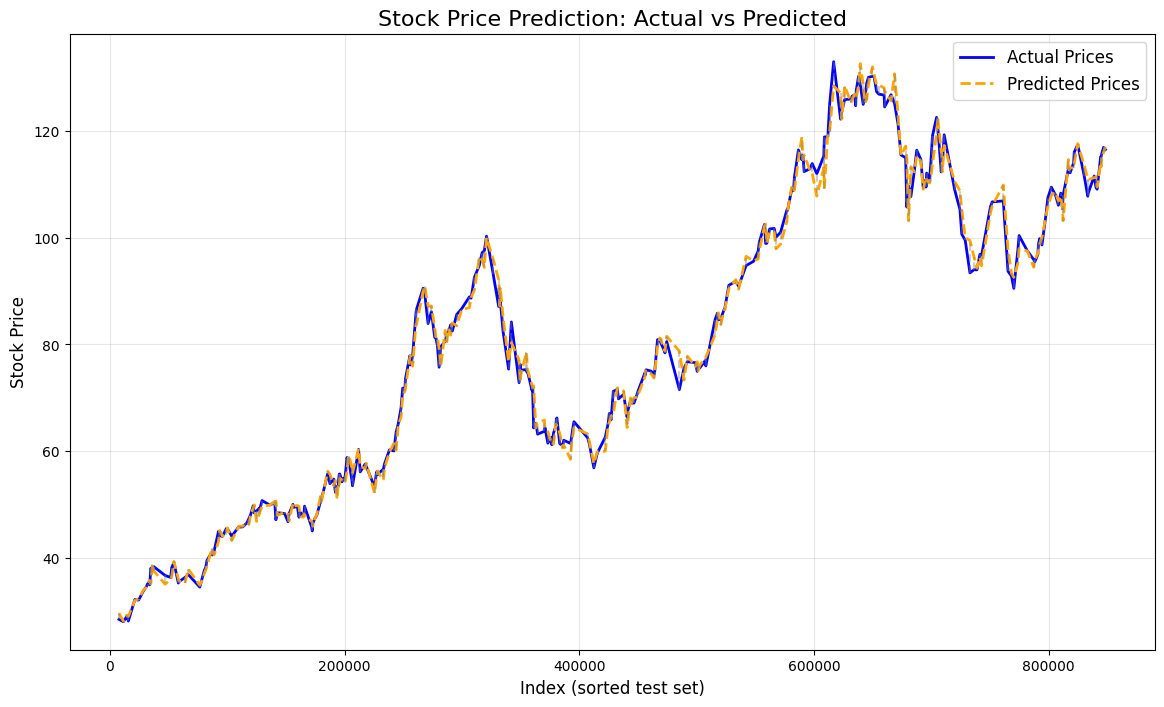

In [67]:
# Better Visualization: Actual vs Predicted Prices
plt.figure(figsize=(14, 8))

# Sort test data for smoother plotting
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=X_test.index).sort_index()

# Plot actual prices
plt.plot(test_data.index, test_data['Actual'], label='Actual Prices', color='blue', linewidth=2)

# Plot predicted prices
plt.plot(test_data.index, test_data['Predicted'], label='Predicted Prices', color='orange', linestyle='--', linewidth=2)

plt.title("Stock Price Prediction: Actual vs Predicted", fontsize=16)
plt.xlabel("Index (sorted test set)", fontsize=12)
plt.ylabel("Stock Price", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Highlight differences
for i in range(len(test_data)):
    plt.plot([test_data.index[i], test_data.index[i]],
             [test_data['Actual'].iloc[i], test_data['Predicted'].iloc[i]],
             color='gray', alpha=0.4, linestyle='--')

plt.show()

# Logistic regression using a real-world dataset

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

In [69]:
# Display the first few rows
print("Dataset preview:")
print(data.head())

# Check for missing values
print("\nMissing values count:")
print(data.isnull().sum())


Dataset preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values count:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                

In [70]:
# Replace zero values in specific columns with NaN (indicates missing values)
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    data[col].replace(0, np.nan, inplace=True)

# Fill missing values with the column mean
data.fillna(data.mean(), inplace=True)

# Split data into features and target
X = data.drop(columns='Outcome')
y = data['Outcome']

<ipython-input-70-d11e678f13ae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, np.nan, inplace=True)


In [71]:
# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [73]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.74

Confusion Matrix:
[[124  27]
 [ 33  47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [74]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sgd_logistic_regression(X, y, learning_rate=0.1, epochs=10, batch_size=32):
    np.random.seed(42)  # For reproducibility
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features) * 0.01  # Small random initialization
    bias = 0

    # Training loop
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]

        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch, y_batch = X[start:end], y[start:end]

            # Predictions
            linear_model = np.dot(X_batch, weights) + bias
            y_pred = sigmoid(linear_model)

            # Gradients
            error = y_pred - y_batch
            dw = np.dot(X_batch.T, error) / batch_size
            db = np.sum(error) / batch_size

            # Weight updates
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Calculate and print loss every 100 epochs
        if (epoch + 1) % 1 == 0:
            y_preds = sigmoid(np.dot(X, weights) + bias)
            loss = -np.mean(y * np.log(y_preds) + (1 - y) * np.log(1 - y_preds))
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return weights, bias


In [75]:
# Split data into features and target
X = data.drop(columns='Outcome')
y = data['Outcome']

# Standardize features for better convergence
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model using SGD
weights, bias = sgd_logistic_regression(X_train.values, y_train.values, learning_rate=0.2, epochs=10)


Epoch 1/10, Loss: 0.5040
Epoch 2/10, Loss: 0.4799
Epoch 3/10, Loss: 0.4710
Epoch 4/10, Loss: 0.4671
Epoch 5/10, Loss: 0.4651
Epoch 6/10, Loss: 0.4642
Epoch 7/10, Loss: 0.4634
Epoch 8/10, Loss: 0.4630
Epoch 9/10, Loss: 0.4628
Epoch 10/10, Loss: 0.4627


In [76]:

# Make predictions on the test set
y_test_pred = sigmoid(np.dot(X_test.values, weights) + bias)
y_test_pred_class = [1 if i > 0.5 else 0 for i in y_test_pred]

# Evaluate model
accuracy = accuracy_score(y_test, y_test_pred_class)
print(f'Accuracy: {accuracy:.4f}')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_class))
print("Classification Report:")
print(classification_report(y_test, y_test_pred_class))

Accuracy: 0.7597
Confusion Matrix:
[[83 16]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

